In [1]:
from __future__ import division, print_function

import datetime

import os
import sys
from collections import OrderedDict
import cPickle as pickle
import numpy as np
from scipy import special

from astropy import units as u


from astropy import constants as cnst
from astropy.coordinates import SkyCoord
from astropy.modeling import models
from astropy.io import fits, ascii
from astropy import table, cosmology

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import patches

rcParams['figure.figsize'] = (16, 10)
rcParams['image.interpolation'] = 'none'
rcParams['image.origin'] = 'lower'

In [3]:
def save_pub_figure(basename, figdir='figures', fig=None):
    import os
    if fig is None:
        fig = plt.gcf()
    plt.savefig(os.path.join(figdir, basename+'.pdf'))
    plt.savefig(os.path.join(figdir, basename+'.png'))

In [4]:
with open('pisces12.random.sfh.info') as f:
    print(f.read())

Relevant columns:

(1) log lookback time initial [yr]
(2) log lookback time final [yr]
(4) most likely SFR [Msun/yr]
(5) upper uncertainty on SFR (i.e., columns 4+5 = upper bound for plotting)
(6) lower uncertainty on SFR

(13) Most likely cumulative SFH
(14) upper uncertainty on cumulative SFH (i.e., columns 13 + 14 = upper bound for plotting)
(15) lower uncertainty on cumulative SFH

Columns (7) - (12) contains information about the metallicity solution, which I don’t think it relevant for this work.



In [5]:
def update_cols(tab):
    #tab['col1'].unit = u.yr
    tab['col1'].name = 'loglookbackbin_i'
    
    #tab['col2'].unit = u.yr
    tab['col2'].name = 'loglookbackbin_f'
    
    tab['col4'].unit = u.solMass/u.yr
    tab['col4'].name = 'SFR'
    tab['col5'].unit = u.solMass/u.yr
    tab['col5'].name = 'SFR+'
    tab['col6'].unit = u.solMass/u.yr
    tab['col6'].name = 'SFR-'
    
    
    tab['col13'].unit = u.solMass
    tab['col13'].name = 'SFH'
    tab['col14'].unit = u.solMass
    tab['col14'].name = 'SFH+'
    tab['col15'].unit = u.solMass
    tab['col15'].name = 'SFH-'

In [6]:
lbt0 = cosmology.WMAP9.lookback_time(np.inf)
lbt0

<Quantity 13.768899510508358 Gyr>

# Pisc A 

In [8]:
#tabA = table.QTable.read('pisces1.random.sfh', format='ascii')
tabA = table.QTable.read('pisces1.final.sfh', format='ascii', data_start=1)
update_cols(tabA)
tabA

loglookbackbin_i,loglookbackbin_f,col3,SFR,SFR+,SFR-,col7,col8,col9,col10,col11,col12,SFH,SFH+,SFH-
,,,solMass / yr,solMass / yr,solMass / yr,,,,,,,solMass,solMass,solMass
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
6.6,6.7,28.73,0.0,0.0017964,0.0,0.0,0.0,1.3,0.0,0.153,0.0,1.0,0.0,0.0
6.7,6.8,28.73,0.0,0.0018321,0.0,0.0,0.0,1.3,0.0,0.153,0.0,1.0,0.0,0.0002
6.8,6.9,28.73,0.0,0.0070115,0.0,0.0,0.0,1.393,0.0,0.216,0.0,1.0,0.0,0.0004
6.9,7.0,28.73,0.0031898,0.0,0.0031898,-1.3,1.304,0.0,0.153,0.0,0.153,1.0,0.0,0.0012
7.0,7.1,28.73,0.0,0.001737,0.0,0.0,0.0,1.393,0.0,0.216,0.0,0.9994,0.0005,0.0006
7.1,7.2,28.73,0.0022635,0.0,0.0022635,-1.3,1.304,0.0,0.153,0.0,0.153,0.9994,0.0,0.001
7.2,7.3,28.73,0.0,0.0015352,0.0,0.0,0.0,1.337,0.0,0.216,0.0,0.9987,0.0002,0.0009
7.3,7.4,28.73,0.0,0.0058536,0.0,0.0,0.0,1.3,0.0,0.216,0.0,0.9987,0.0002,0.0011


In [9]:
tsA = u.yr*10**np.array([tabA['loglookbackbin_i'], tabA['loglookbackbin_f']]).T.flatten()

sfhsA = np.array([tabA['SFH'], tabA['SFH']]).T.flatten()
sfhpsA = sfhsA + np.array([tabA['SFH+'], tabA['SFH+']]).T.flatten()
sfhmsA = sfhsA - np.array([tabA['SFH-'], tabA['SFH-']]).T.flatten()

sfrsA = np.array([tabA['SFR'], tabA['SFR']]).T.flatten()
sfrpsA = sfrsA + np.array([tabA['SFR+'], tabA['SFR+']]).T.flatten()
sfrmsA = sfrsA - np.array([tabA['SFR-'], tabA['SFR-']]).T.flatten()

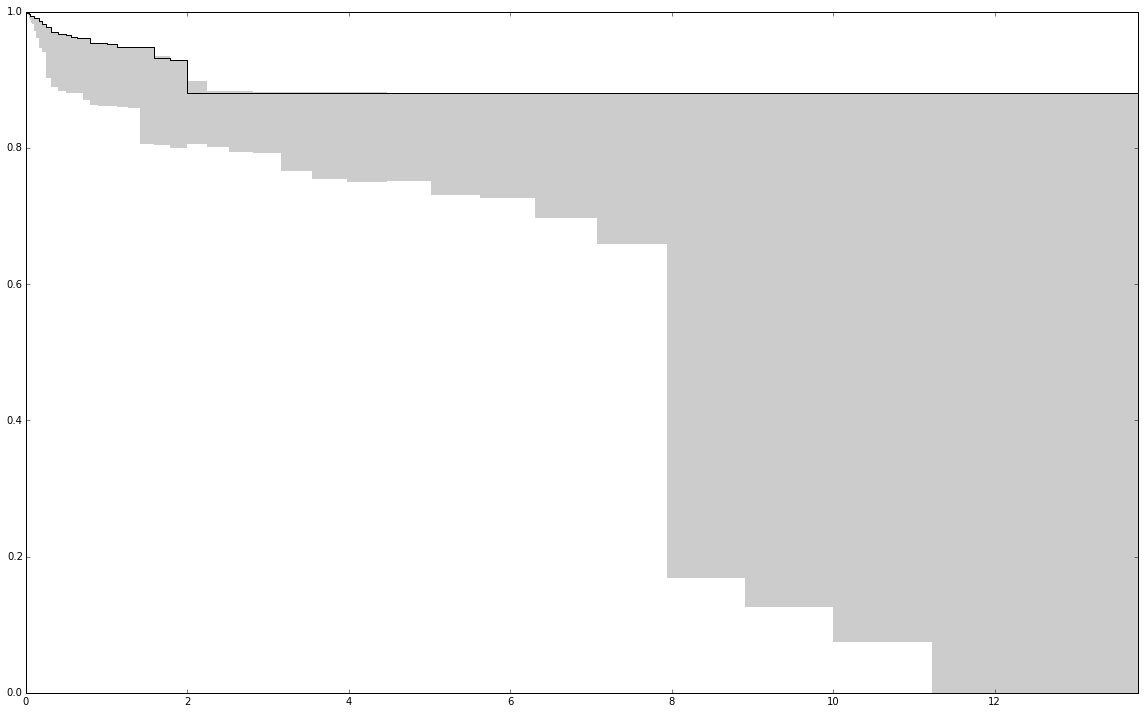

In [10]:
plt.fill_between(tsA.to(u.Gyr),sfhmsA, sfhpsA, lw=0, facecolor=[0.8]*3)
plt.plot(tsA.to(u.Gyr),sfhsA, c='k')
plt.xlim(0, lbt0.to(u.Gyr).value)
#plt.ylim(0,1)
plt.tight_layout()

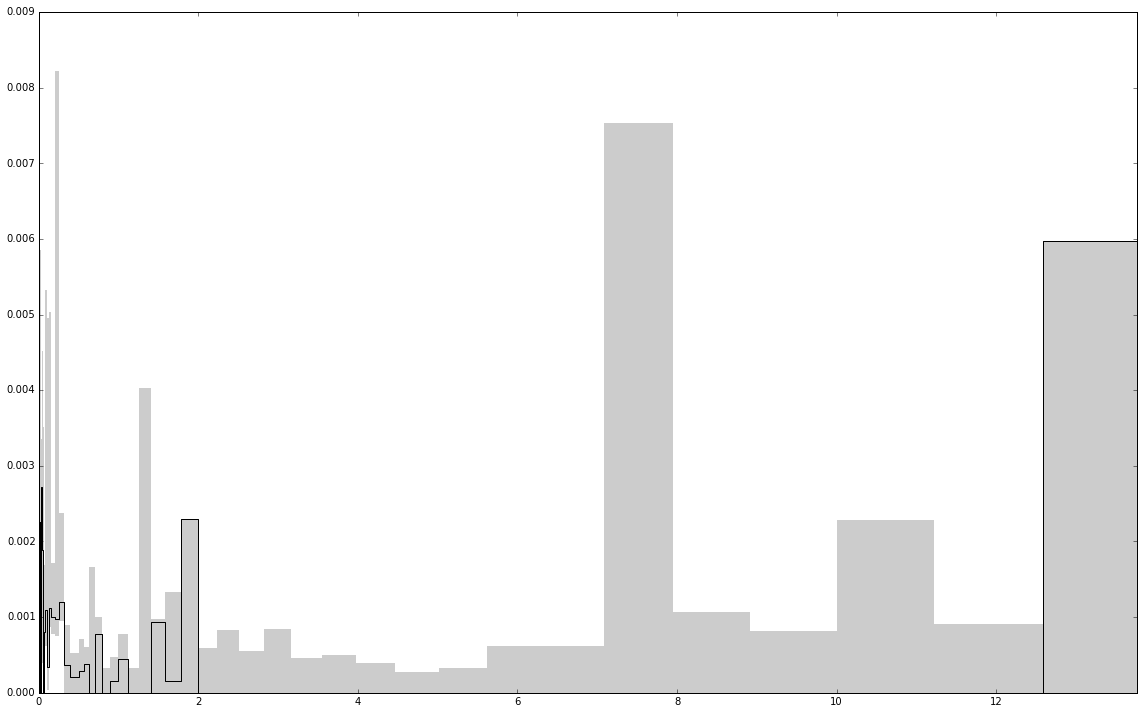

In [11]:
plt.fill_between(tsA.to(u.Gyr),sfrmsA, sfrpsA, lw=0, facecolor=[0.8]*3)
plt.plot(tsA.to(u.Gyr),sfrsA, c='k')
plt.xlim(0, lbt0.to(u.Gyr).value)
plt.tight_layout()

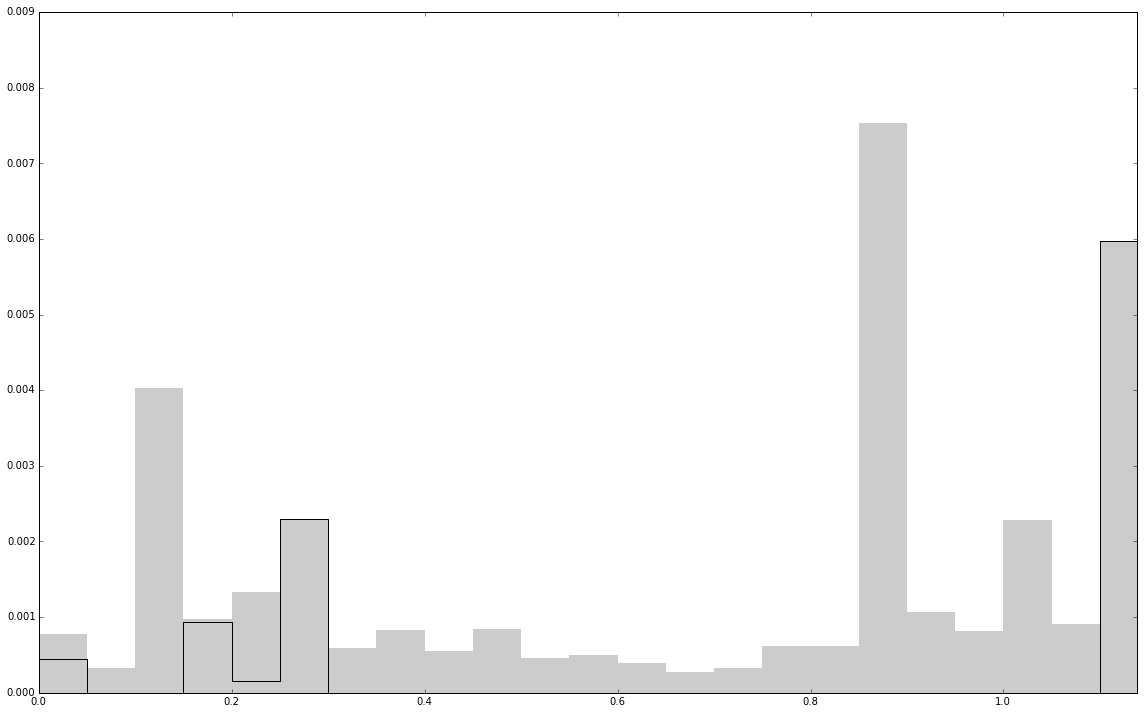

In [12]:
plt.fill_between(np.log10(tsA/u.Gyr),sfrmsA, sfrpsA, lw=0, facecolor=[0.8]*3)
plt.plot(np.log10(tsA/u.Gyr),sfrsA, c='k')
plt.xlim(0, np.log10(lbt0.to(u.Gyr).value))
plt.tight_layout()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10


(7.0168941609718578, 0.4270412286357983, -1.7653913063276034)

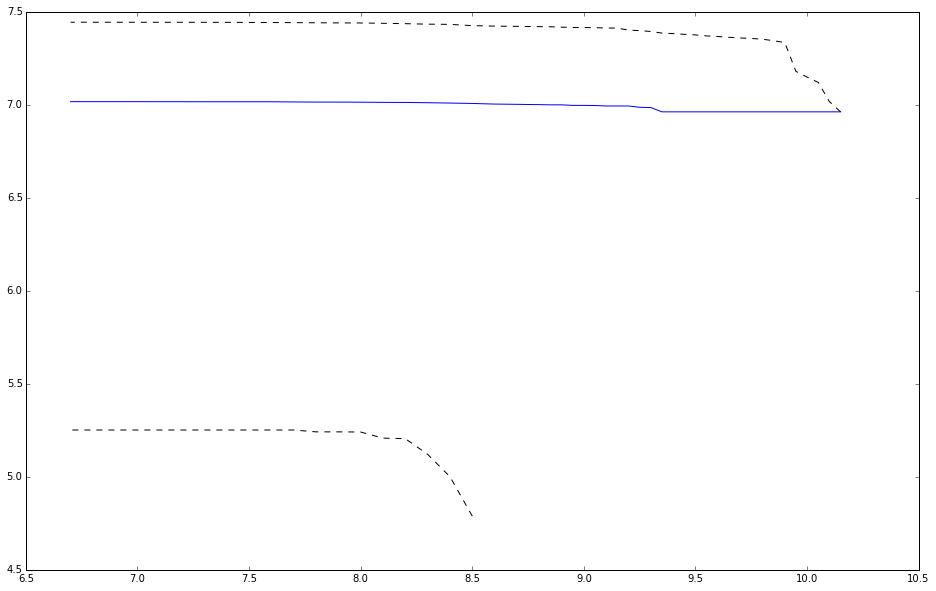

In [14]:
#compute total sf
sfrts = []
sfrtsp = []
sfrtsm = []
for i, f, sfr, sfrp, sfrm in zip(tabA['loglookbackbin_i'], tabA['loglookbackbin_f'], 
                                 tabA['SFR'], tabA['SFR+'], tabA['SFR-']):
    dt = (10**f - 10**i)
    sfrts.append(dt*sfr)
    sfrtsp.append(dt*(sfr+sfrp))
    sfrtsm.append(dt*(sfr-sfrm))

ts = (tabA['loglookbackbin_f'] + tabA['loglookbackbin_f'])/2
    
plt.plot(ts[::-1], np.log10(np.cumsum(sfrts[::-1])))
plt.plot(ts[::-1], np.log10(np.cumsum(sfrtsp[::-1])), '--k')
plt.plot(ts[::-1], np.log10(np.cumsum(sfrtsm[::-1])), '--k')

lsfr = np.log10(np.sum(sfrts))
lsfrp = np.log10(np.sum(sfrtsp))
lsfrm = np.log10(np.sum(sfrtsm))

lsfr, lsfrp - lsfr, lsfrm - lsfr

# Pisc B

In [15]:
#tabB = table.QTable.read('pisces2.random.sfh', format='ascii')
tabB = table.QTable.read('pisces2.final.sfh', format='ascii', data_start=1)
update_cols(tabB)
tabB

loglookbackbin_i,loglookbackbin_f,col3,SFR,SFR+,SFR-,col7,col8,col9,col10,col11,col12,SFH,SFH+,SFH-
,,,solMass / yr,solMass / yr,solMass / yr,,,,,,,solMass,solMass,solMass
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
6.6,6.7,29.72,0.0,0.0044787,0.0,0.0,0.0,0.5,0.0,0.153,0.0,1.0,0.0,0.0
6.7,6.8,29.72,0.0039976,0.000277,0.0039976,-0.5,0.5,0.001,0.153,0.0,0.153,1.0,0.0,0.0002
6.8,6.9,29.72,0.0017315,0.003449,0.0017315,-0.5,0.0,0.001,0.153,0.0,0.0,0.9998,0.0001,0.0001
6.9,7.0,29.72,0.0016121,0.0013646,0.0016121,-0.5,0.5,0.0,0.153,0.0,0.153,0.9998,0.0001,0.0004
7.0,7.1,29.72,0.0,0.0026297,0.0,0.0,0.0,0.5,0.0,0.153,0.0,0.9997,0.0001,0.0004
7.1,7.2,29.72,0.0023669,0.0043134,0.0023669,-0.5,0.0,0.002,0.153,0.0,0.0,0.9997,0.0001,0.0005
7.2,7.3,29.72,0.0078824,0.0010809,0.0078824,-0.501,0.501,0.001,0.153,0.0,0.153,0.9994,0.0001,0.0006
7.3,7.4,29.72,7.4613e-05,0.0038547,7.4613e-05,-0.501,0.501,0.001,0.153,0.0,0.153,0.9985,0.0005,0.0008


In [16]:
tsB = u.yr*10**np.array([tabB['loglookbackbin_i'], tabB['loglookbackbin_f']]).T.flatten()

sfhsB = np.array([tabB['SFH'], tabB['SFH']]).T.flatten()
sfhpsB = sfhsB + np.array([tabB['SFH+'], tabB['SFH+']]).T.flatten()
sfhmsB = sfhsB - np.array([tabB['SFH-'], tabB['SFH-']]).T.flatten()

sfrsB = np.array([tabB['SFR'], tabB['SFR']]).T.flatten()
sfrpsB = sfrsB + np.array([tabB['SFR+'], tabB['SFR+']]).T.flatten()
sfrmsB = sfrsB - np.array([tabB['SFR-'], tabB['SFR-']]).T.flatten()

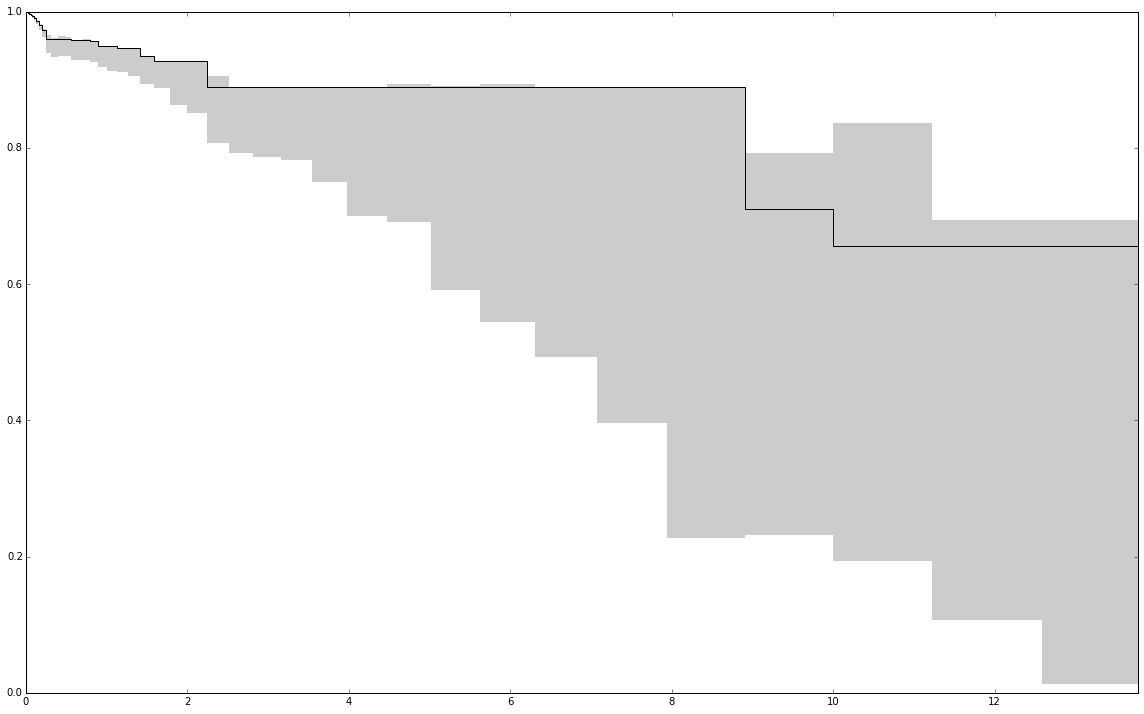

In [17]:
plt.fill_between(tsB*1e-9,sfhmsB, sfhpsB, edgecolor='', facecolor=[0.8]*3)
plt.plot(tsB*1e-9,sfhsB,c='k')
plt.xlim(0, lbt0.to(u.Gyr).value)
#plt.ylim(0,1)
plt.tight_layout()

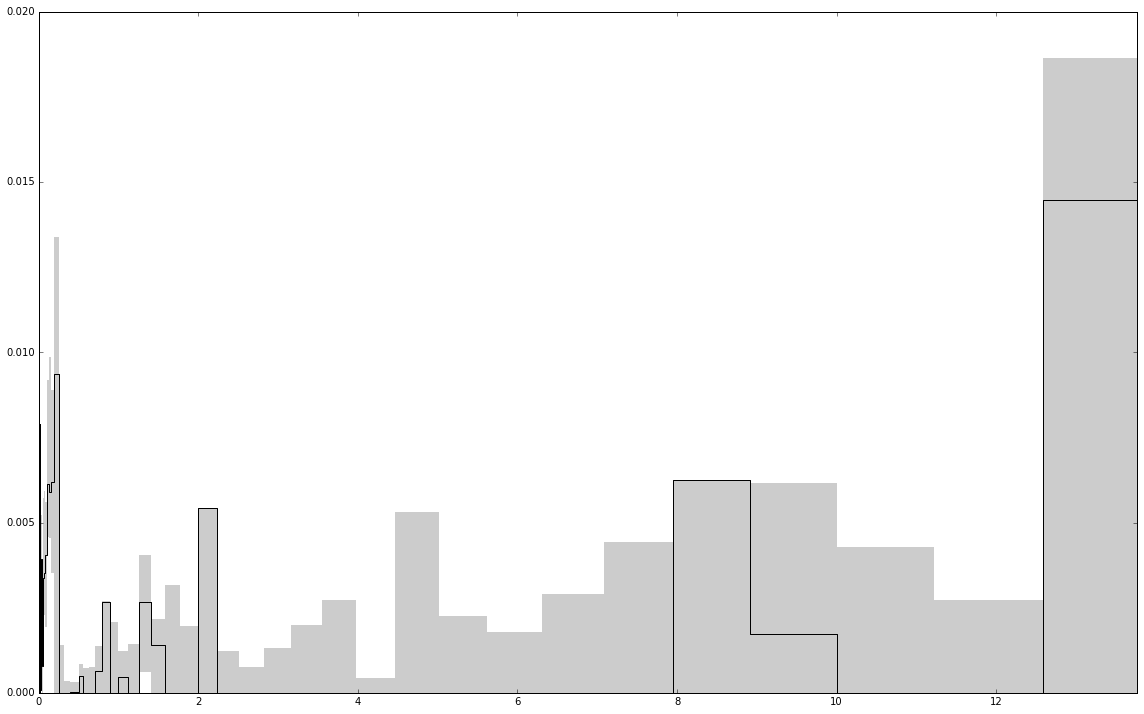

In [18]:
plt.fill_between(tsB*1e-9,sfrmsB, sfrpsB, lw=0, facecolor=[0.8]*3)
plt.plot(tsB*1e-9,sfrsB, c='k')
plt.xlim(0, lbt0.to(u.Gyr).value)
plt.tight_layout()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10


(7.5304050555294886, 0.32613157000741744, -1.7462202187414606)

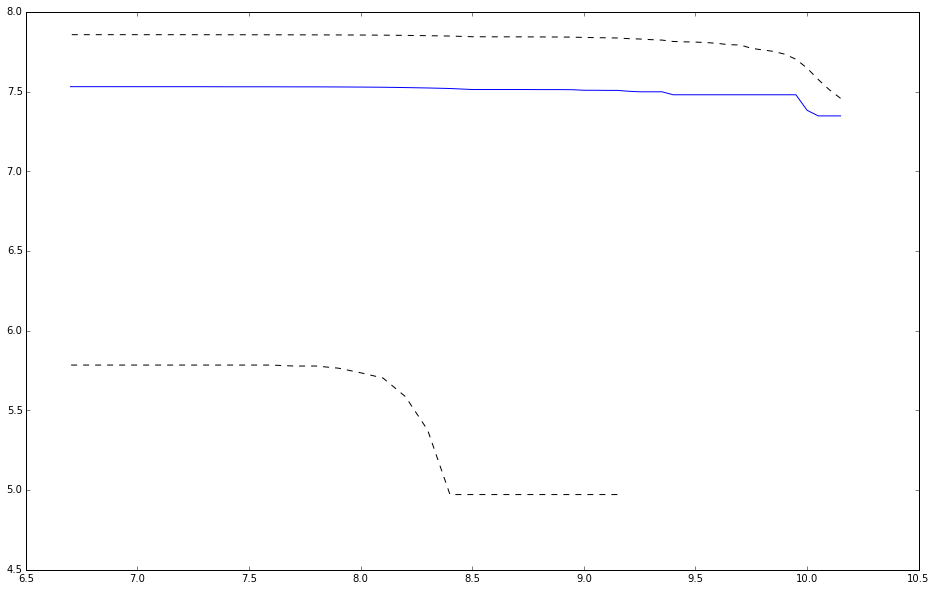

In [19]:
#compute total sf
sfrts = []
sfrtsp = []
sfrtsm = []
for i, f, sfr, sfrp, sfrm in zip(tabB['loglookbackbin_i'], tabB['loglookbackbin_f'], 
                                 tabB['SFR'], tabB['SFR+'], tabB['SFR-']):
    dt = (10**f - 10**i)
    sfrts.append(dt*sfr)
    sfrtsp.append(dt*(sfr+sfrp))
    sfrtsm.append(dt*(sfr-sfrm))

ts = (tabB['loglookbackbin_f'] + tabB['loglookbackbin_f'])/2
    
plt.plot(ts[::-1], np.log10(np.cumsum(sfrts[::-1])))
plt.plot(ts[::-1], np.log10(np.cumsum(sfrtsp[::-1])), '--k')
plt.plot(ts[::-1], np.log10(np.cumsum(sfrtsm[::-1])), '--k')

lsfr = np.log10(np.sum(sfrts))
lsfrp = np.log10(np.sum(sfrtsp))
lsfrm = np.log10(np.sum(sfrtsm))

lsfr, lsfrp - lsfr, lsfrm - lsfr

# Figure in differential form

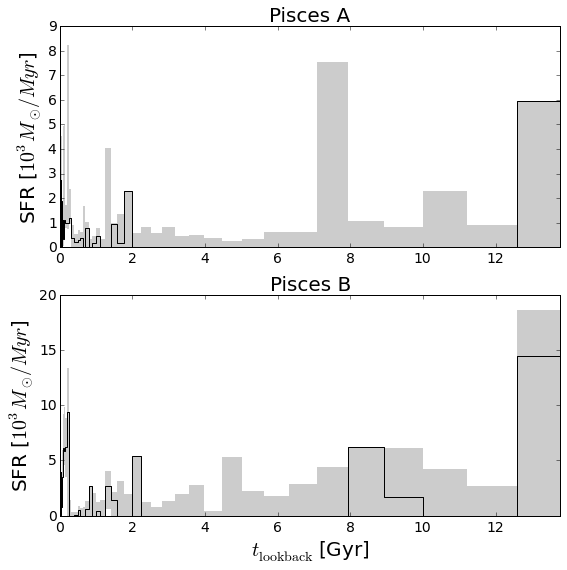

In [20]:
plt.figure(figsize=(8,8))

xlabel = r'$t_{\rm lookback}$ [Gyr]'
ylabel = r'SFR [$10^{3} M_\odot/Myr$]'
yscale = 10**3
tckfontsize = 14
labelfontsize = 20

plt.subplot(2, 1, 1)
plt.fill_between(tsA.to(u.Gyr),sfrmsA*yscale, sfrpsA*yscale, lw=0, facecolor=[0.8]*3)
plt.plot(tsA.to(u.Gyr),sfrsA*yscale, c='k')
plt.xlim(0, lbt0.to(u.Gyr).value)
plt.xticks(fontsize=tckfontsize)
plt.yticks(fontsize=tckfontsize)
plt.title('Pisces A', fontsize=labelfontsize)
plt.ylabel(ylabel, fontsize=labelfontsize)


plt.subplot(2, 1, 2)
plt.title('Pisces B', fontsize=labelfontsize)
plt.fill_between(tsB.to(u.Gyr),sfrmsB*yscale, sfrpsB*yscale, lw=0, facecolor=[0.8]*3)
plt.plot(tsB.to(u.Gyr),sfrsB*yscale, c='k')
plt.xlim(0, lbt0.to(u.Gyr).value)
plt.xticks(fontsize=tckfontsize)
plt.yticks(fontsize=tckfontsize)
plt.xlabel(xlabel, fontsize=labelfontsize)
plt.ylabel(ylabel, fontsize=labelfontsize)

plt.tight_layout()
save_pub_figure('sfhs_diff')

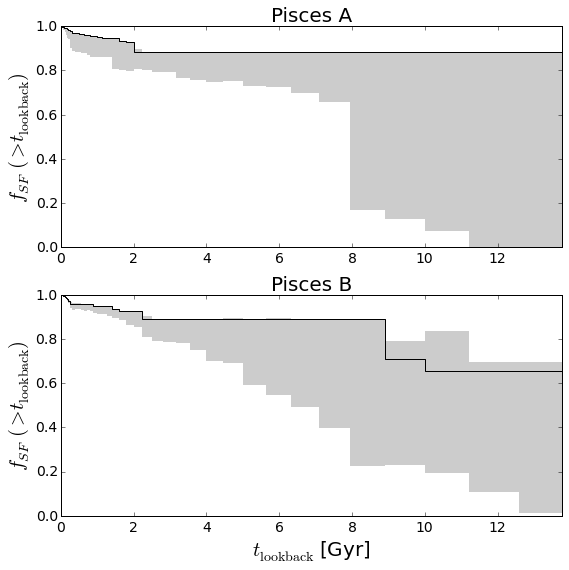

In [21]:
plt.figure(figsize=(8,8))

xlabel = r'$t_{\rm lookback}$ [Gyr]'
ylabel = r'$f_{SF}\,(>t_{\rm lookback})$'
tckfontsize = 14
labelfontsize = 20

plt.subplot(2, 1, 1)
plt.fill_between(tsA.to(u.Gyr),sfhmsA, sfhpsA, lw=0, facecolor=[0.8]*3)
plt.plot(tsA.to(u.Gyr),sfhsA, c='k')
#plt.fill_between(tsA.to(u.Gyr),sfrmsA*yscale, sfrpsA*yscale, lw=0, facecolor=[0.8]*3)
#plt.plot(tsA.to(u.Gyr),sfrsA*yscale, c='k')
plt.xlim(0, lbt0.to(u.Gyr).value)
plt.xticks(fontsize=tckfontsize)
plt.yticks(fontsize=tckfontsize)
plt.title('Pisces A', fontsize=labelfontsize)
plt.ylim(0, 1)
plt.ylabel(ylabel, fontsize=labelfontsize)


plt.subplot(2, 1, 2)
plt.title('Pisces B', fontsize=labelfontsize)
plt.fill_between(tsB.to(u.Gyr), sfhmsB, sfhpsB, lw=0, facecolor=[0.8]*3)
plt.plot(tsB.to(u.Gyr),sfhsB, c='k')
#plt.fill_between(tsB.to(u.Gyr),sfrmsB*yscale, sfrpsB*yscale, lw=0, facecolor=[0.8]*3)
#plt.plot(tsB.to(u.Gyr),sfrsB*yscale, c='k')
plt.xlim(0, lbt0.to(u.Gyr).value)
plt.xticks(fontsize=tckfontsize)
plt.yticks(fontsize=tckfontsize)
plt.xlabel(xlabel, fontsize=labelfontsize)
plt.ylim(0, 1)
plt.ylabel(ylabel, fontsize=labelfontsize)

plt.tight_layout()
save_pub_figure('sfhs_cum')